 ---- Data Table 
 Programmer  Prog1_time  Prog2_time IDE_A IDE_B  IDE_A_time  IDE_B_time  Difference
          1         104        71.3 Prog1 Prog2       104.0        71.3        32.7
          2         102       110.0 Prog2 Prog1       110.0       102.0         8.0
          3         159       178.0 Prog1 Prog2       159.0       178.0       -19.0
          4         168       153.0 Prog1 Prog2       168.0       153.0        15.0
          5         150       120.0 Prog2 Prog1       120.0       150.0       -30.0
          6         151       174.0 Prog2 Prog1       174.0       151.0        23.0
          7         111        94.9 Prog1 Prog2       111.0        94.9        16.1
          8         105        86.1 Prog2 Prog1        86.1       105.0       -18.9
          9         137       115.0 Prog1 Prog2       137.0       115.0        22.0
         10         124       175.0 Prog2 Prog1       175.0       124.0        51.0

 ---- Descriptive Statistics 
Mean Prog1: 131.10
Mean Pro

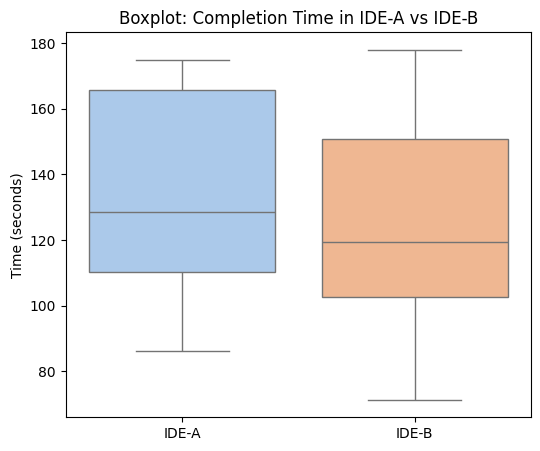

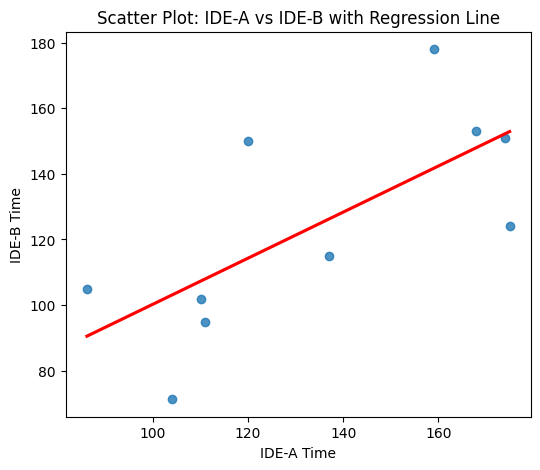

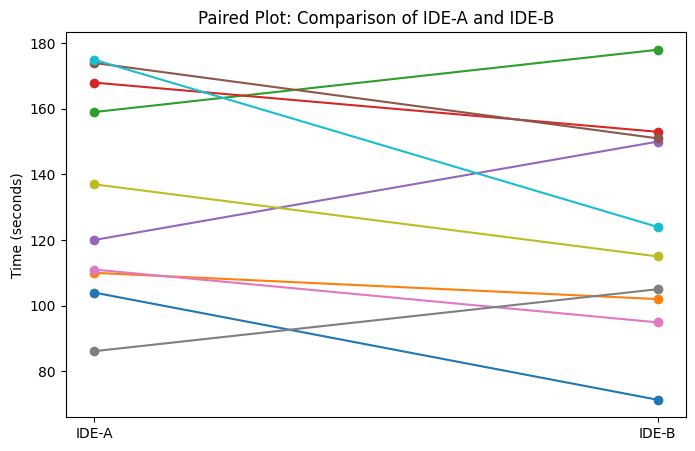

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data from the experiment
data = {
    "Programmer": range(1, 11),
    "Prog1_time": [104, 102, 159, 168, 150, 151, 111, 105, 137, 124],
    "Prog2_time": [71.3, 110, 178, 153, 120, 174, 94.9, 86.1, 115, 175]
}

df = pd.DataFrame(data)

# Assignments (as in Table 1)
ide_a_assignment = ["Prog1", "Prog2", "Prog1", "Prog1", "Prog2",
                    "Prog2", "Prog1", "Prog2", "Prog1", "Prog2"]

ide_b_assignment = ["Prog2", "Prog1", "Prog2", "Prog2", "Prog1",
                    "Prog1", "Prog2", "Prog1", "Prog2", "Prog1"]

df["IDE_A"] = ide_a_assignment
df["IDE_B"] = ide_b_assignment

# Pairing results: time in IDE-A vs IDE-B
ide_a_times = []
ide_b_times = []

for i in range(len(df)):
    if df.loc[i, "IDE_A"] == "Prog1":
        ide_a_times.append(df.loc[i, "Prog1_time"])
        ide_b_times.append(df.loc[i, "Prog2_time"])
    else:
        ide_a_times.append(df.loc[i, "Prog2_time"])
        ide_b_times.append(df.loc[i, "Prog1_time"])

df["IDE_A_time"] = ide_a_times
df["IDE_B_time"] = ide_b_times
df["Difference"] = df["IDE_A_time"] - df["IDE_B_time"]

# Descriptive statistics
mean_prog1 = df["Prog1_time"].mean()
mean_prog2 = df["Prog2_time"].mean()
mean_diff = df["Difference"].mean()
std_diff = df["Difference"].std(ddof=1)

# Normality tests
shapiro_test = stats.shapiro(df["Difference"])
ks_test = stats.kstest((df["Difference"] - df["Difference"].mean()) / df["Difference"].std(ddof=1), 'norm')

# Paired t-test
t_stat, p_value = stats.ttest_rel(df["IDE_A_time"], df["IDE_B_time"])

# Output
print(" ---- Data Table ")
print(df.to_string(index=False))
print("\n ---- Descriptive Statistics ")
print(f"Mean Prog1: {mean_prog1:.2f}")
print(f"Mean Prog2: {mean_prog2:.2f}")
print(f"Mean Difference (IDE-A - IDE-B): {mean_diff:.2f}")
print(f"Std. Deviation of Difference: {std_diff:.2f}\n")

print(" ---- Normality Check ")
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic:.3f}, p={shapiro_test.pvalue:.3f}")
print(f"Kolmogorov-Smirnov Test: D={ks_test.statistic:.3f}, p={ks_test.pvalue:.3f}\n")

print(" ---- Paired t-test ")
print(f"t = {t_stat:.3f}, p = {p_value:.3f}")
if p_value < 0.05:
    print("Result: Reject H0 → Significant difference between IDE-A and IDE-B")
else:
    print("Result: Fail to reject H0 → No significant difference between IDE-A and IDE-B")

# Visualization

# Boxplot for comparison
plt.figure(figsize=(6,5))
sns.boxplot(data=[df["IDE_A_time"], df["IDE_B_time"]], palette="pastel")
plt.xticks([0, 1], ["IDE-A", "IDE-B"])
plt.title("Boxplot: Completion Time in IDE-A vs IDE-B")
plt.ylabel("Time (seconds)")
plt.show()

# Scatter plot with regression line
plt.figure(figsize=(6,5))
sns.regplot(x=df["IDE_A_time"], y=df["IDE_B_time"], ci=None, line_kws={"color":"red"})
plt.xlabel("IDE-A Time")
plt.ylabel("IDE-B Time")
plt.title("Scatter Plot: IDE-A vs IDE-B with Regression Line")
plt.show()

# Paired plot (IDE-A vs IDE-B for each programmer)
plt.figure(figsize=(8,5))
for i in range(len(df)):
    plt.plot([1, 2], [df.loc[i, "IDE_A_time"], df.loc[i, "IDE_B_time"]], marker="o")
plt.xticks([1, 2], ["IDE-A", "IDE-B"])
plt.title("Paired Plot: Comparison of IDE-A and IDE-B")
plt.ylabel("Time (seconds)")
plt.show()
